<a href="https://colab.research.google.com/github/mnngit/100DML/blob/main/D37missing_category_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/drive/MyDrive/100DML/datasets/train37d.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])

In [11]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [13]:
# df = df[['GarageQual', 'FireplaceQu', 'SalePrice']]

In [15]:
# df.head()

In [16]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

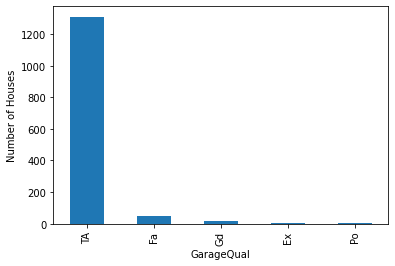

In [17]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [18]:
df['GarageQual'].fillna('missing', inplace=True)



Text(0, 0.5, 'Number of Houses')

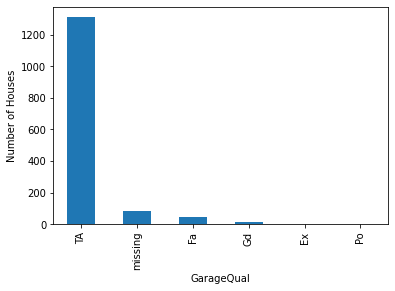

In [19]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')

In [23]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [24]:
imputer.statistics_

array(['missing', 'missing'], dtype=object)